In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier


In [2]:
# load the data
df = pd.read_csv('./Data/Final_18_features_extracted_V2.csv')

In [3]:
X = df.drop(columns=["Region","File Name"],axis=1)
y = df['Region']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=17,shuffle=True
)

In [6]:
X.columns

Index(['MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13', 'AMP_ENV', 'RMSE',
       'ZCR', 'SPEC_CENT', 'SPEC_BAND'],
      dtype='object')

In [7]:
features = {
    "f1":"MFCC1",
    "f2":"MFCC2",
    "f3":"MFCC3",
    "f4":"MFCC4",
    "f5":"MFCC5",
    "f6":"MFCC6",
    "f7":"MFCC7",
    "f8":"MFCC8",
    "f9":"MFCC9",
    "f10":"MFCC10",
    "f11":"MFCC11",
    "f12":"MFCC12",
    "f13":"MFCC13",
    "f14":"AMP_ENV",
    "f15":"RMSE",
    "f16":"ZCR",
    "f17":"SPEC_CENT",
    "f18":"SPEC_BAND"
}

In [10]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=17)
forest = RandomForestClassifier(random_state=17,n_jobs=-1,max_features=18,n_estimators=1000)

In [11]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_features=18, n_estimators=1000, n_jobs=-1,
                       random_state=17)

- plotting important features

In [14]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 18
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")
for f in range(num_to_plot):
    print(
        "%d. %s %f "
        % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
    )

Feature ranking:
1. AMP_ENV 0.084040 
2. MFCC1 0.082800 
3. SPEC_BAND 0.078242 
4. MFCC6 0.073550 
5. MFCC7 0.071135 
6. MFCC3 0.062700 
7. MFCC13 0.057533 
8. MFCC10 0.054999 
9. MFCC8 0.054092 
10. MFCC5 0.052056 
11. MFCC9 0.049209 
12. RMSE 0.048324 
13. MFCC4 0.047207 
14. MFCC2 0.045336 
15. MFCC12 0.042981 
16. MFCC11 0.042576 
17. ZCR 0.032602 
18. SPEC_CENT 0.020617 


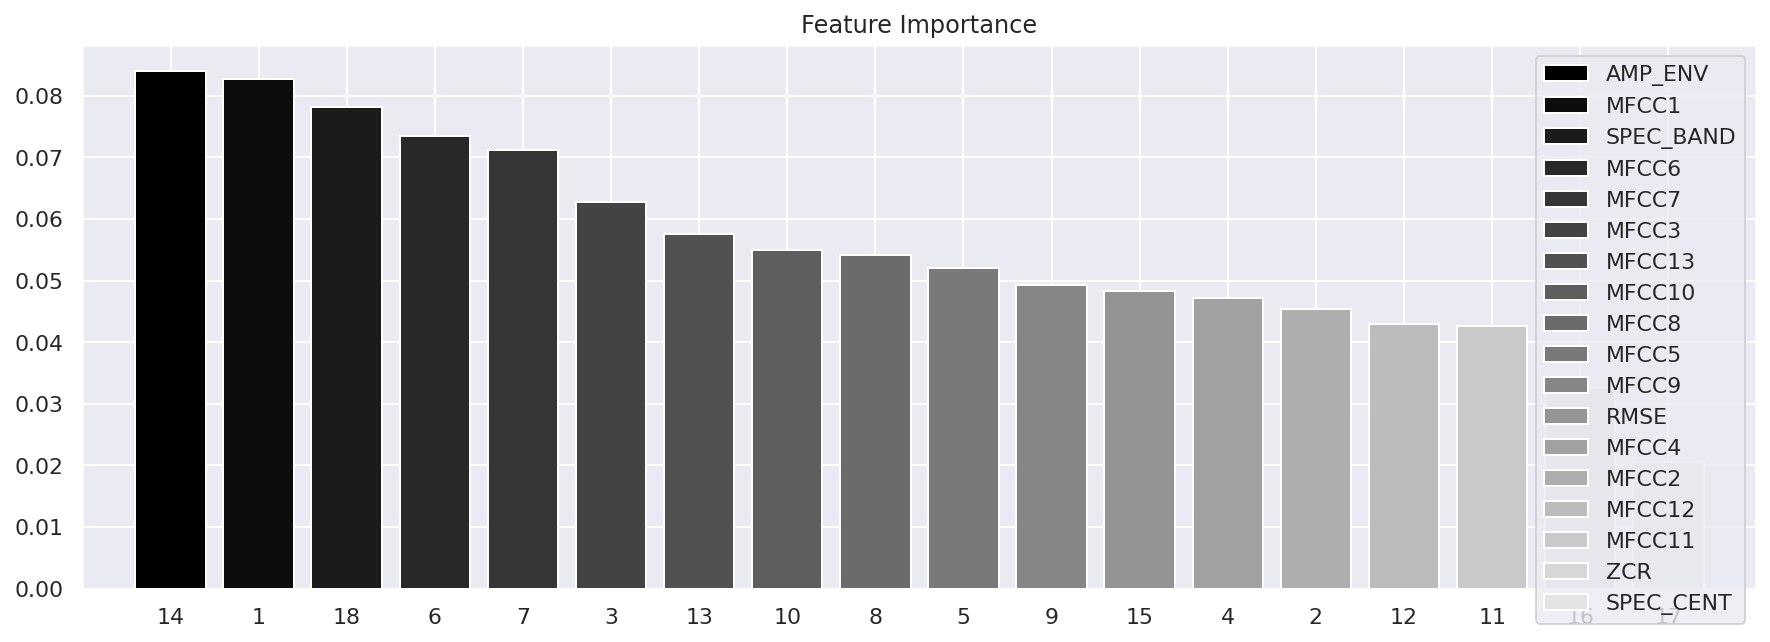

In [15]:
plt.figure(figsize=(15, 5))
plt.title(u"Feature Importance")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center",
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);